In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv("Housing_Num_with_labels.csv")

# Select the features and the target column
feature_columns = ["LotFrontage", "TotalBsmtSF", "1stFlrSF", "BedroomAbvGr", "GarageCars", "GarageArea", "SalePrice"]
X = data[feature_columns]
y = data["MSZoning"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler for better SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and test SVM models with different kernels
kernels = ["linear", "poly", "rbf"]
for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    
    # Calculate the confusion matrix and accuracy
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Confusion Matrix: {cm}, Accuracy: {accuracy}")


Kernel: linear, Confusion Matrix: [[ 2  0  0]
 [ 0 12  5]
 [ 0  6 26]], Accuracy: 0.7843137254901961
Kernel: poly, Confusion Matrix: [[ 1  0  1]
 [ 0  5 12]
 [ 0  1 31]], Accuracy: 0.7254901960784313
Kernel: rbf, Confusion Matrix: [[ 0  0  2]
 [ 0 12  5]
 [ 0  7 25]], Accuracy: 0.7254901960784313


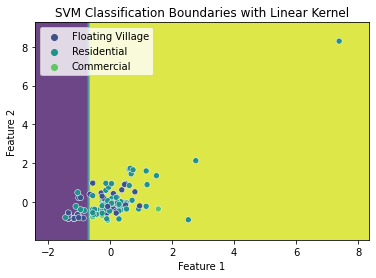

In [3]:
from sklearn.preprocessing import LabelEncoder

# Scatter plot of the classification boundaries for the 2D feature space
# We will use the first two features for visualization purposes
X_vis = X_train[:, :2]

# Convert string labels to numerical values
le = LabelEncoder()
y_num = le.fit_transform(y)
y_vis = le.transform(y_train)

# Train the SVM model with the best performing kernel (replace 'best_kernel' with the actual kernel name)
best_kernel = "linear"  # Replace this with the actual best performing kernel
svm_model = SVC(kernel=best_kernel, C=1)
svm_model.fit(X_vis, y_vis)

# Create a mesh grid for the scatter plot
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the labels for the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the classification boundaries and data points
plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=le.inverse_transform(y_vis), palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"SVM Classification Boundaries with {best_kernel.capitalize()} Kernel")
plt.show()
